# Train Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

## Importing the Train.csv

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Project/4.Microsoft/train_sample.csv')

In [ ]:
df_train.head(3)

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,5172780,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,BenignPositive,NaN,NaN,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,Casdet,4132,4227,3586,NaN,NaN,5,66,NaN,Suspicious,Malicious,242,1445,10630
1,8470561,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,NaN,BenignPositive,NaN,NaN,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,3142,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,5897583,1090921697002,201,150787,807590,2024-06-13T03:36:40.000Z,419,444,Execution,T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1...,BenignPositive,NaN,NaN,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,4181,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,Destination,5,66,NaN,NaN,NaN,242,1445,10630


In [ ]:
df_train = df_train.drop(['Unnamed: 0'], axis=1)

In [ ]:
df_train.shape

(4758418, 45)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

## Data Cleaning

### Treating Null Values

In [ ]:
df_train.isnull().sum()

,0
Id,0
OrgId,0
IncidentId,0
AlertId,0
Timestamp,0
DetectorId,0
AlertTitle,0
Category,0
MitreTechniques,2733136
IncidentGrade,25775


In [ ]:
null_values_in_cent = pd.DataFrame({
    'Null_values_Count' : df_train.isnull().sum(),
    'Null_values_Percentage' : df_train.isnull().sum()/len(df_train)*100
})

null_values_in_cent

,Null_values_Count,Null_values_Percentage
Id,0,0.000000
OrgId,0,0.000000
IncidentId,0,0.000000
AlertId,0,0.000000
Timestamp,0,0.000000
DetectorId,0,0.000000
AlertTitle,0,0.000000
Category,0,0.000000
MitreTechniques,2733136,57.437913
IncidentGrade,25775,0.541672


In [ ]:
# Removing 50% of the Null values
threshold= len(df_train)* 0.5
df_train = df_train.dropna(thresh=threshold,axis=1)

In [ ]:
df_train.isnull().sum()

,0
Id,0
OrgId,0
IncidentId,0
AlertId,0
Timestamp,0
DetectorId,0
AlertTitle,0
Category,0
IncidentGrade,25775
EntityType,0


In [ ]:
df_train.shape

(4758418, 35)

In [ ]:
df_train['IncidentGrade'].value_counts()

,count
IncidentGrade,
BenignPositive,2054774
TruePositive,1662087
FalsePositive,1015782


In [ ]:
df_train['IncidentGrade'].isnull().sum()


25775

In [ ]:
df_train = df_train.dropna(subset=['IncidentGrade'])
df_train['IncidentGrade'].isnull().sum()


0

In [ ]:
df_train.duplicated().sum()

155243

In [ ]:
df_train = df_train.drop_duplicates()
df_train.duplicated().sum()

0

In [ ]:
df_train.shape

(4577400, 35)

In [ ]:
df_train.isna().sum()

,0
Id,0
OrgId,0
IncidentId,0
AlertId,0
Timestamp,0
DetectorId,0
AlertTitle,0
Category,0
IncidentGrade,0
EntityType,0


### Changing the Dtype

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4577400 entries, 0 to 4758417
Data columns (total 35 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   Timestamp           object
 5   DetectorId          int64 
 6   AlertTitle          int64 
 7   Category            object
 8   IncidentGrade       object
 9   EntityType          object
 10  EvidenceRole        object
 11  DeviceId            int64 
 12  Sha256              int64 
 13  IpAddress           int64 
 14  Url                 int64 
 15  AccountSid          int64 
 16  AccountUpn          int64 
 17  AccountObjectId     int64 
 18  AccountName         int64 
 19  DeviceName          int64 
 20  NetworkMessageId    int64 
 21  RegistryKey         int64 
 22  RegistryValueName   int64 
 23  RegistryValueData   int64 
 24  ApplicationId       int64 
 25  ApplicationName     int

In [ ]:
df_train['Timestamp'] = pd.to_datetime(df_train['Timestamp'])

In [ ]:
df_train.Timestamp.dtype

datetime64[ns, UTC]

In [ ]:
df_train['Day'] = df_train['Timestamp'].dt.day
df_train['Month'] = df_train['Timestamp'].dt.month
df_train['Year'] = df_train['Timestamp'].dt.year
df_train['Hour'] = df_train['Timestamp'].dt.hour
df_train['Time'] = df_train['Timestamp'].dt.time

In [ ]:
df_train.drop('Timestamp', axis=1)

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Day,Month,Year,Hour,Time
0,1709396985476,26,18583,687462,31,813,Malware,BenignPositive,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,4132,4227,3586,5,66,242,1445,10630,6,6,2024,5,05:56:47
1,927712939180,33,5065,3990,38,25,Impact,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,3142,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,3,6,2024,10,10:45:09
2,1090921697002,201,150787,807590,419,444,Execution,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,4181,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,13,6,2024,3,03:36:40
3,1434519079555,204,108287,28575,44,1233,SuspiciousActivity,TruePositive,File,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,97007,9177,3586,5,66,242,1445,10630,8,6,2024,16,16:54:57
4,1005022347708,54,528202,1458226,102,58829,Exfiltration,BenignPositive,File,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,39978,114449,3586,5,66,242,1445,10630,9,6,2024,2,02:48:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758413,103079215470,142,93987,15739,112,7836,Exfiltration,FalsePositive,MailMessage,Impacted,98799,138268,360606,160396,441377,308666,425863,453297,153085,869,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,10,6,2024,10,10:25:17
4758414,1683627184337,36,1001,257479,2,2,CommandAndControl,FalsePositive,User,Impacted,98799,138268,360606,160396,32117,96088,32986,36982,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,11,6,2024,19,19:30:52
4758415,1597727836318,851,31194,1518250,1,1,InitialAccess,BenignPositive,MailMessage,Related,98799,138268,360606,160396,441377,42275,425863,453297,153085,402271,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,9,6,2024,4,04:27:41
4758416,137438957239,12,2419,1203,16,1334,Impact,BenignPositive,Ip,Related,98799,138268,546,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,21,5,2024,23,23:01:11


In [ ]:
for col in df_train.columns:
  print("----------------------------------------------------------------------------------------------------------------")
  print(f'Unique values for column {col}: {df_train[col].unique()}')


----------------------------------------------------------------------------------------------------------------
Unique values for column Id: [1709396985476  927712939180 1090921697002 ... 1511828493061 1408749273700
 1168231108101]
----------------------------------------------------------------------------------------------------------------
Unique values for column OrgId: [  26   33  201 ... 5515 5354 3909]
----------------------------------------------------------------------------------------------------------------
Unique values for column IncidentId: [ 18583   5065 150787 ... 502875 580652 207395]
----------------------------------------------------------------------------------------------------------------
Unique values for column AlertId: [ 687462    3990  807590 ... 1709125  266048  588370]
----------------------------------------------------------------------------------------------------------------
Unique values for column Timestamp: <DatetimeArray>
['2024-06-06 05:56:47+

In [ ]:
categorical_cols = df_train.select_dtypes(include=['object']).columns
categorical_cols

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Time'], dtype='object')

In [ ]:
cat_col = ['Category','IncidentGrade','EntityType', 'EvidenceRole']
df_train[cat_col].describe()

,Category,IncidentGrade,EntityType,EvidenceRole
count,4577400,4577400,4577400,4577400
unique,20,3,31,2
top,InitialAccess,BenignPositive,Ip,Related
freq,1990165,1973943,1088602,2491054


In [ ]:
df_train['EvidenceRole'].unique()

array(['Related', 'Impacted'], dtype=object)

In [ ]:
df_train['Month'].value_counts()

,count
Month,
6,4150040
5,426681
2,162
1,155
4,153
3,126
12,78
11,5


In [ ]:
df_train['IncidentGrade'].value_counts()

,count
IncidentGrade,
BenignPositive,1973943
TruePositive,1608957
FalsePositive,994500


In [ ]:
df_train['EvidenceRole'].value_counts()

,count
EvidenceRole,
Related,2491054
Impacted,2086346


## EDA

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4577400 entries, 0 to 4758417
Data columns (total 40 columns):
 #   Column              Dtype              
---  ------              -----              
 0   Id                  int64              
 1   OrgId               int64              
 2   IncidentId          int64              
 3   AlertId             int64              
 4   Timestamp           datetime64[ns, UTC]
 5   DetectorId          int64              
 6   AlertTitle          int64              
 7   Category            object             
 8   IncidentGrade       object             
 9   EntityType          object             
 10  EvidenceRole        object             
 11  DeviceId            int64              
 12  Sha256              int64              
 13  IpAddress           int64              
 14  Url                 int64              
 15  AccountSid          int64              
 16  AccountUpn          int64              
 17  AccountObjectId     int64       

In [ ]:
for col in df_train.columns:
  print(f"{col} : {df_train[col].nunique()}")


Id : 642342
OrgId : 5236
IncidentId : 421530
AlertId : 1150459
Timestamp : 719084
DetectorId : 7369
AlertTitle : 74710
Category : 20
IncidentGrade : 3
EntityType : 31
EvidenceRole : 2
DeviceId : 55204
Sha256 : 73078
IpAddress : 195384
Url : 85332
AccountSid : 265788
AccountUpn : 394186
AccountObjectId : 257733
AccountName : 272375
DeviceName : 80956
NetworkMessageId : 260032
RegistryKey : 937
RegistryValueName : 401
RegistryValueData : 496
ApplicationId : 1003
ApplicationName : 1610
OAuthApplicationId : 416
FileName : 142641
FolderPath : 59652
ResourceIdName : 1497
OSFamily : 6
OSVersion : 48
CountryCode : 212
State : 1197
City : 7107
Day : 31
Month : 8
Year : 2
Hour : 24
Time : 86400


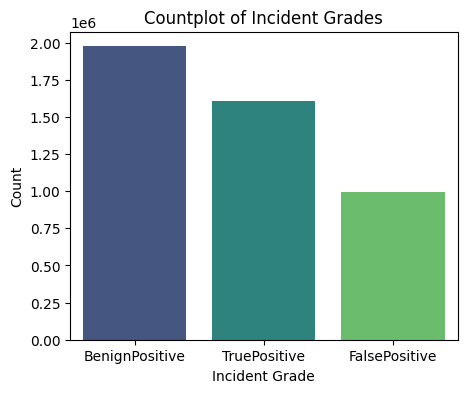

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
sns.countplot(x='IncidentGrade', data=df_train, palette='viridis')
plt.title('Countplot of Incident Grades')
plt.xlabel('Incident Grade')
plt.ylabel('Count')
plt.show()


In [ ]:
print(cat_col)

['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole']


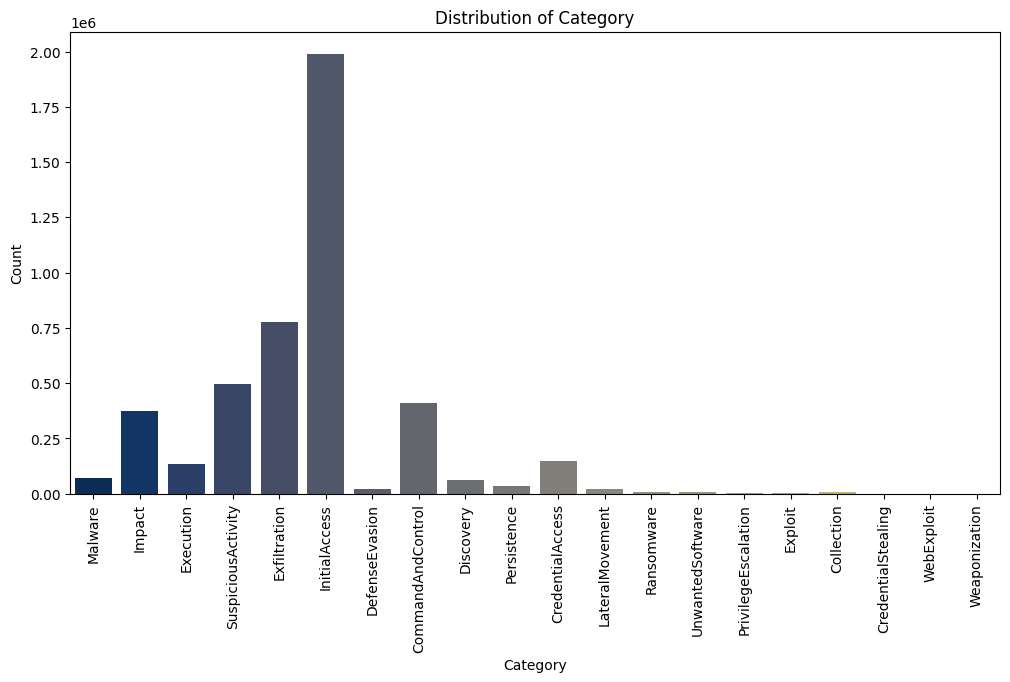

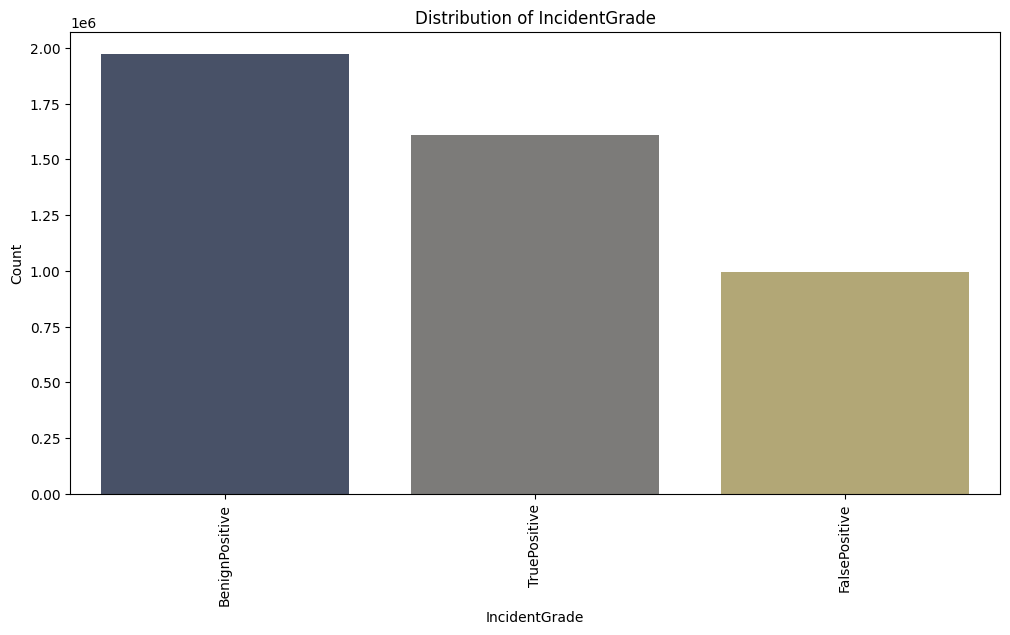

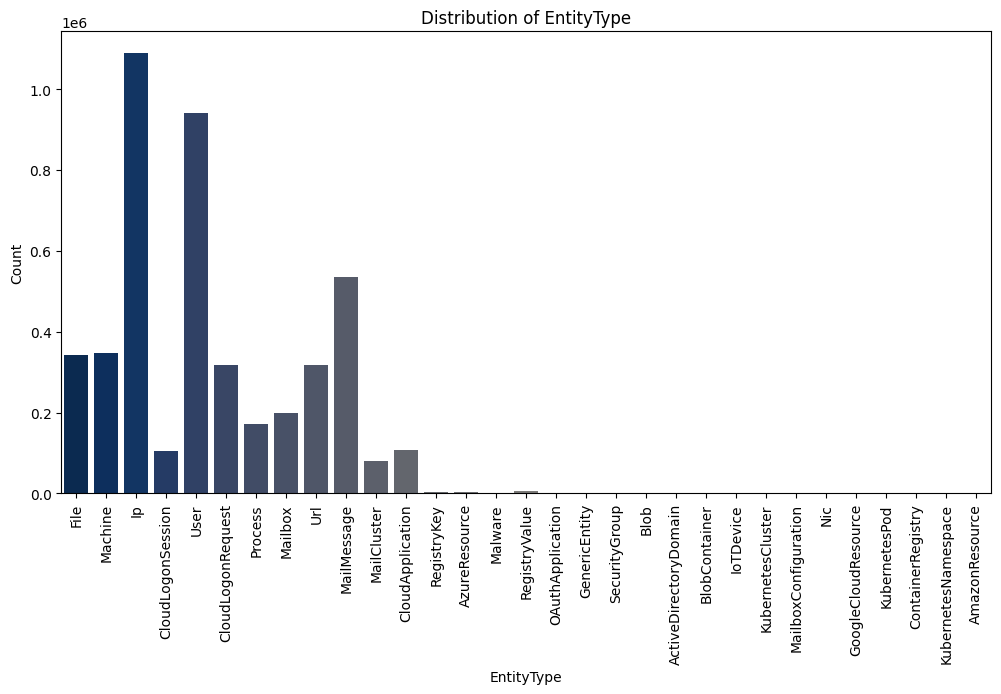

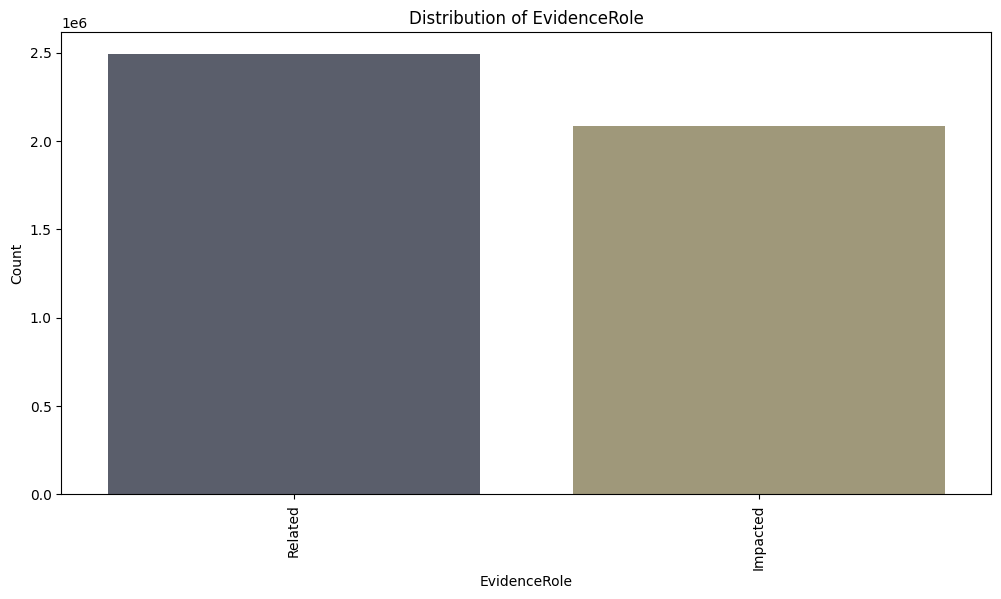

In [ ]:
categorical_columns = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole']

# Plot each categorical column separately
for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, data=df_train, palette='cividis')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()

<Figure size 1200x600 with 0 Axes>

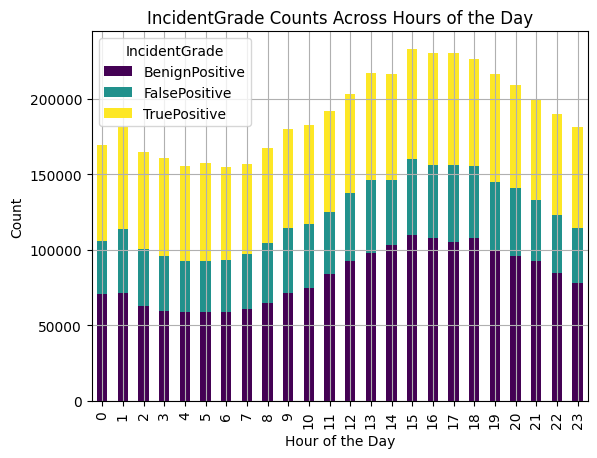

<Figure size 1200x600 with 0 Axes>

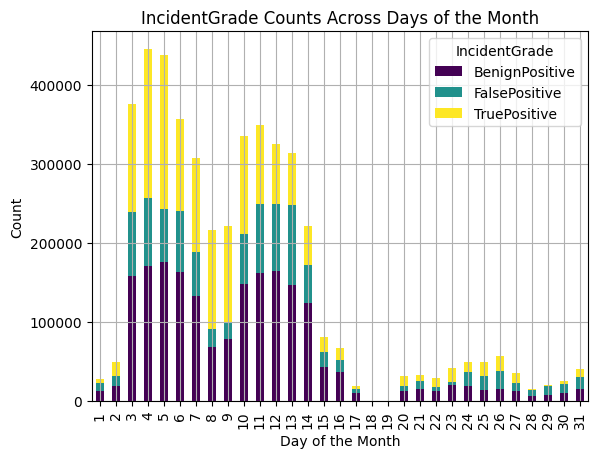

<Figure size 1200x600 with 0 Axes>

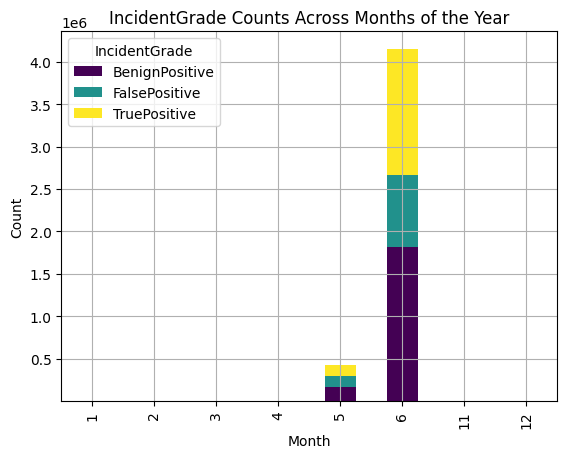

In [ ]:
# Aggregate data
hour_incident_grade = df_train.groupby(['Hour', 'IncidentGrade']).size().unstack()
day_incident_grade = df_train.groupby(['Day', 'IncidentGrade']).size().unstack()
month_incident_grade = df_train.groupby(['Month', 'IncidentGrade']).size().unstack()

# Hourly distribution (stacked bar plot)
plt.figure(figsize=(12, 6))
hour_incident_grade.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("IncidentGrade Counts Across Hours of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

# Daily distribution (stacked bar plot)
plt.figure(figsize=(12, 6))
day_incident_grade.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("IncidentGrade Counts Across Days of the Month")
plt.xlabel("Day of the Month")
plt.ylabel("Count")
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

# Monthly distribution (stacked bar plot)
plt.figure(figsize=(12, 6))
month_incident_grade.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("IncidentGrade Counts Across Months of the Year")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()


In [ ]:
num_col = df_train.select_dtypes(include=['number'])
num_col.columns


Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Day', 'Month', 'Year', 'Hour'],
      dtype='object')

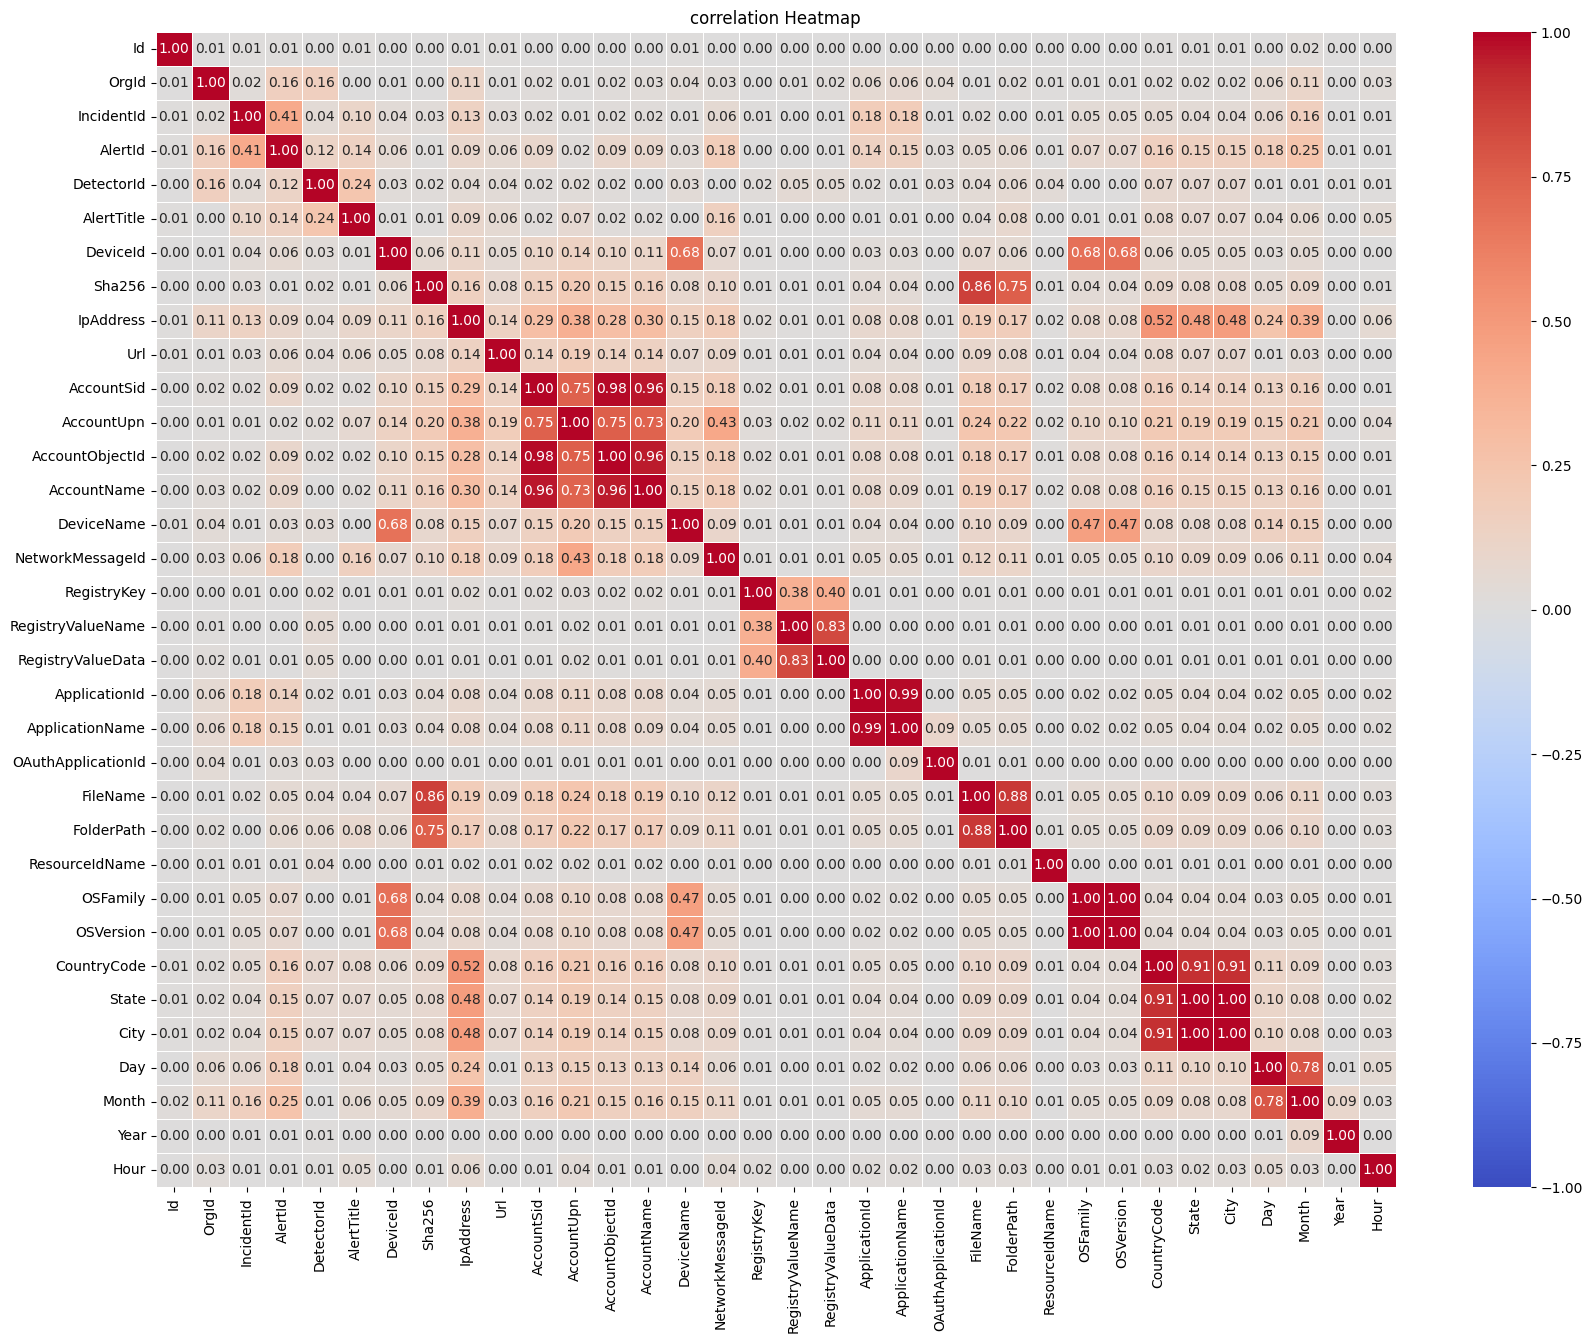

In [ ]:
# selecting numerical col
numeric_df = df_train.select_dtypes(include=['number'])

corr_matrix= numeric_df.corr().abs()

# plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

In [ ]:
# Dropping Highly Correlated Columns dropping columns correlated above 65%
df_train = df_train.drop(["Sha256","AccountSid","AccountUpn","AccountObjectId","RegistryValueName","ApplicationId","FolderPath",
                "CountryCode","State","Month", "OSFamily", "DeviceId" ,"Timestamp"], axis =1)


In [ ]:
df_train.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'IpAddress',
       'Url', 'AccountName', 'DeviceName', 'NetworkMessageId', 'RegistryKey',
       'RegistryValueData', 'ApplicationName', 'OAuthApplicationId',
       'FileName', 'ResourceIdName', 'OSVersion', 'City', 'Day', 'Year',
       'Hour', 'Time'],
      dtype='object')

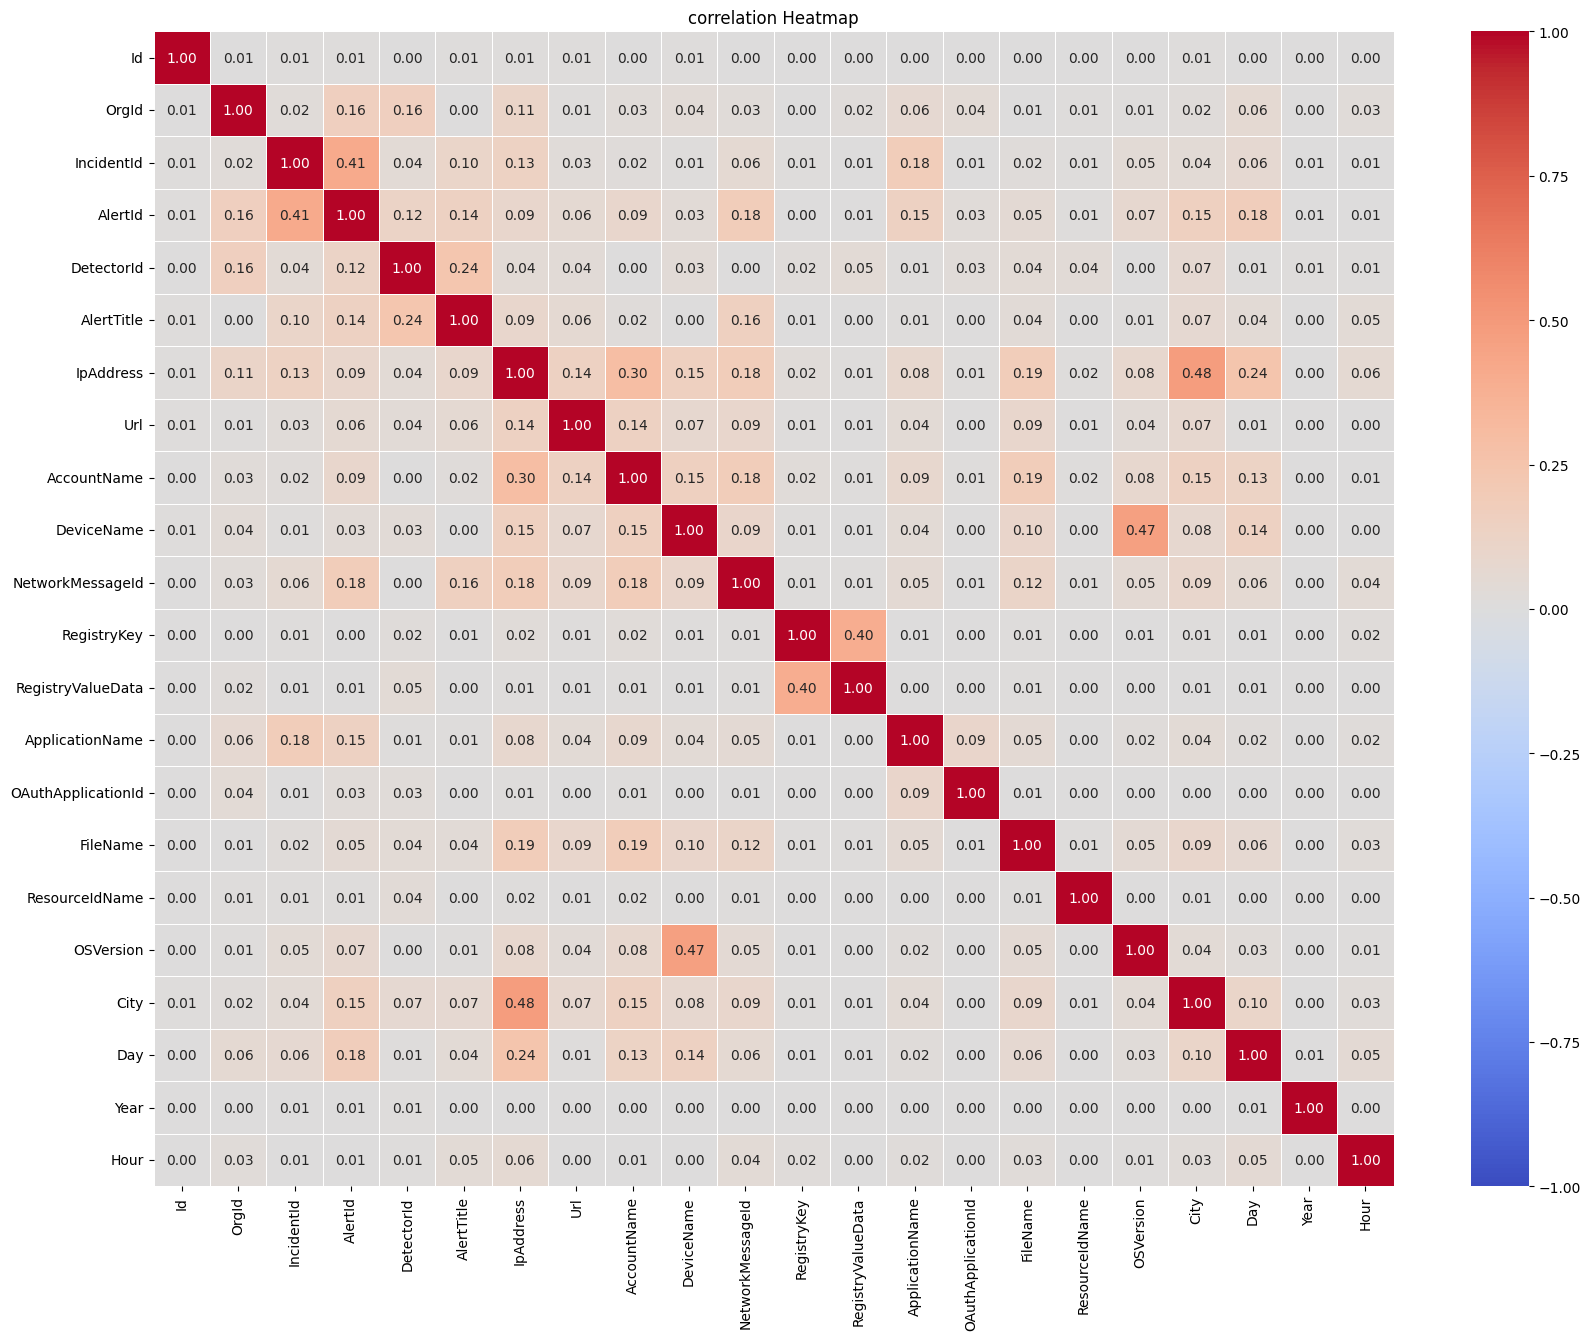

In [ ]:
# selecting numerical col
numeric_df = df_train.select_dtypes(include=['number'])

corr_matrix= numeric_df.corr().abs()

# plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

## Encoding

In [ ]:
for col in df_train.columns:
  print(f" '{col}': {df_train[col].nunique()}")


 'Id': 642342
 'OrgId': 5236
 'IncidentId': 421530
 'AlertId': 1150459
 'DetectorId': 7369
 'AlertTitle': 74710
 'Category': 20
 'IncidentGrade': 3
 'EntityType': 31
 'EvidenceRole': 2
 'IpAddress': 195384
 'Url': 85332
 'AccountName': 272375
 'DeviceName': 80956
 'NetworkMessageId': 260032
 'RegistryKey': 937
 'RegistryValueData': 496
 'ApplicationName': 1610
 'OAuthApplicationId': 416
 'FileName': 142641
 'ResourceIdName': 1497
 'OSVersion': 48
 'City': 7107
 'Day': 31
 'Year': 2
 'Hour': 24
 'Time': 86400


In [ ]:
categorical_cols = df_train.select_dtypes(include=['object']).columns
categorical_cols


Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Time'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in categorical_cols:
    df_train[column] = label_encoder.fit_transform(df_train[column])

In [ ]:
df_train.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationName,OAuthApplicationId,FileName,ResourceIdName,OSVersion,City,Day,Year,Hour,Time
0,1709396985476,26,18583,687462,31,813,12,0,9,1,360606,160396,453297,153085,529644,1631,860,3421,881,4132,3586,66,10630,6,2024,5,21407
1,927712939180,33,5065,3990,38,25,9,0,17,0,360606,160396,453297,3142,529644,1631,860,3421,881,289573,3586,66,10630,3,2024,10,38709
2,1090921697002,201,150787,807590,419,444,6,0,17,0,360606,160396,453297,4181,529644,1631,860,3421,881,289573,3586,66,10630,13,2024,3,13000
3,1434519079555,204,108287,28575,44,1233,16,2,9,1,360606,160396,453297,153085,529644,1631,860,3421,881,97007,3586,66,10630,8,2024,16,60897
4,1005022347708,54,528202,1458226,102,58829,7,0,9,0,360606,160396,453297,153085,529644,1631,860,3421,881,39978,3586,66,10630,9,2024,2,10081


In [ ]:
df_train.to_csv('train_cleaned.csv',index=False)